In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import folium as fo
import json
from itertools import compress
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [19]:
df = pd.read_parquet('resources/cleaned_franchises.parquet')
df.shape

(88111, 23)

In [20]:
df['year'] = df['Inspection Date'].apply(lambda x: x.year)

In [7]:
for y in range(2010, 2019):
    df_year = df[df.year == y]
    inspection_count = df_year.Community.value_counts()
    pass_count = df_year.Community[df_year.Results.apply(lambda x: x == 'Pass')].value_counts()
    norm_pass = pass_count / inspection_count
    
    

In [25]:
franchise_metadata = pd.read_pickle('resources/franchise_metadata.pkl')
franchise_metadata.head(2)

In [39]:
franchise_size_dict = franchise_metadata['Size'].to_dict()
df_zip_codes= pd.read_parquet('resources/zip_infos.parquet')


In [214]:
def corr_per_zip(df):
    df_joined = df.join(df_zip_codes)
    median_income = df_zip_codes.columns[1]
    data_ = df.columns[0]

    df_joined[[data_, median_income]].plot.scatter(x=data_, y=median_income)
    plt.title('Correlation: {}'.format("%.3f" % df_joined[data_].corr(df_joined[median_income])))
    plt.tight_layout()
    plt.show()

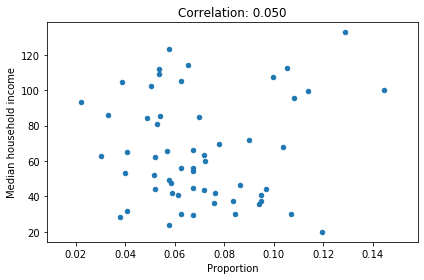

# huge franchise restaurants / # all restaurants in ZIP


In [234]:
huge_zip = df[df['AKA Name'].apply(lambda x: franchise_size_dict[x] == 'Huge')].drop_duplicates('License #')
huge_zip = pd.DataFrame(huge_zip.groupby('Zip').size()/df.drop_duplicates('License #').\
                        groupby('Zip').size()).rename(columns={0:'Proportion'})

corr_per_zip(huge_zip)
print('# huge franchise restaurants / # all restaurants in ZIP')

No Strict correlation between wealth index and # franchises

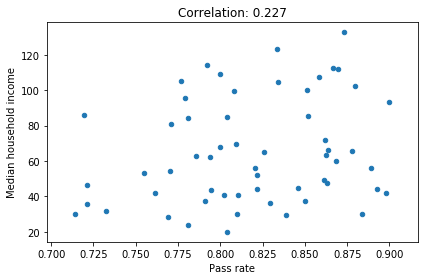

inspection pass rate for huge franchises


In [233]:
franchise = df[df['AKA Name'].apply(lambda x: franchise_size_dict[x] == 'Huge')]
franchise_pass = franchise[franchise.Results == 'Pass']
franchise_pass_rate = pd.DataFrame(franchise_pass.groupby('Zip').size()/ \
                                   franchise.groupby('Zip').size()).rename(columns={0:'Pass rate'})



corr_per_zip(franchise_pass_rate)
print('inspection pass rate for huge franchises')

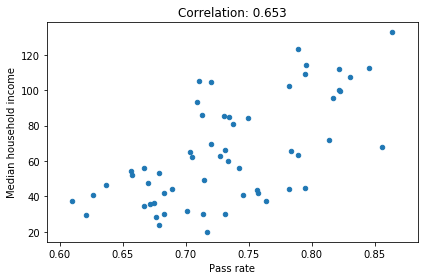

inspection pass rate for small franchises


In [236]:
franchise = df[df['AKA Name'].apply(lambda x: franchise_size_dict[x] == 'Small')]
franchise_pass = franchise[franchise.Results == 'Pass']
franchise_pass_rate = pd.DataFrame(franchise_pass.groupby('Zip').size()/ \
                                   franchise.groupby('Zip').size()).rename(columns={0:'Pass rate'})

corr_per_zip(franchise_pass_rate)
print('inspection pass rate for small franchises')

Small Franchises in richer Zip tends to pass the inspection than those in poorer Zip. (Huge franchise standardization is reallt working 

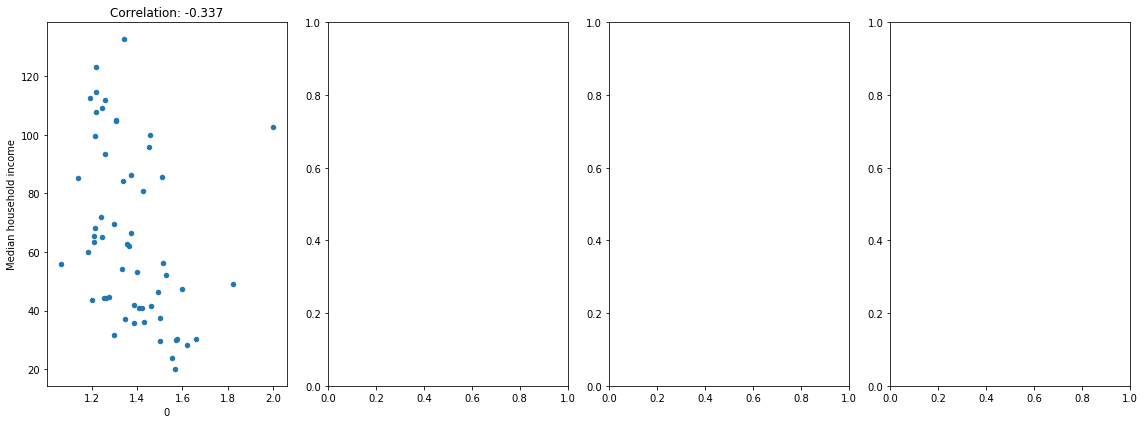

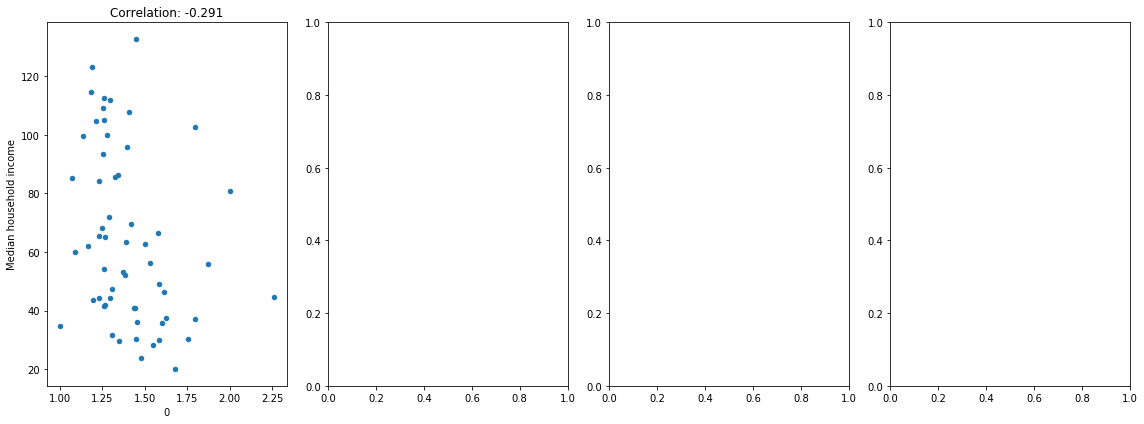

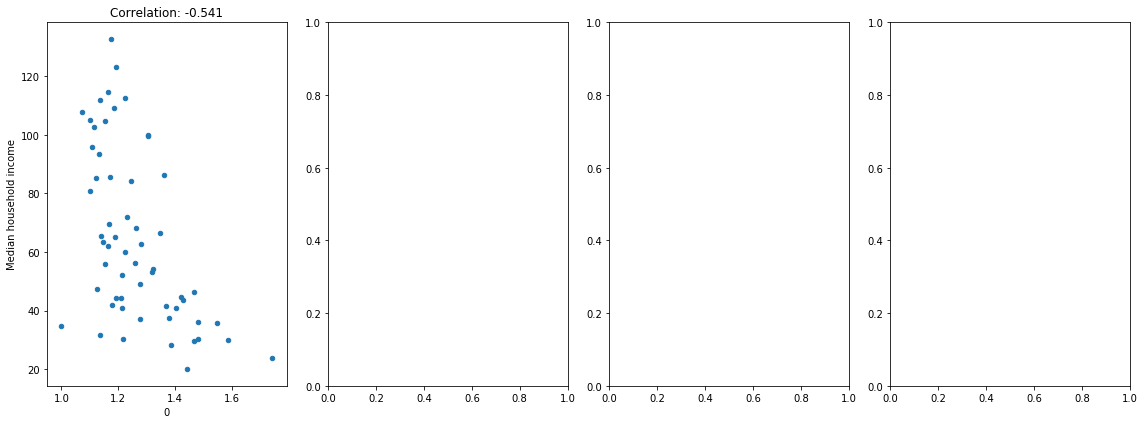

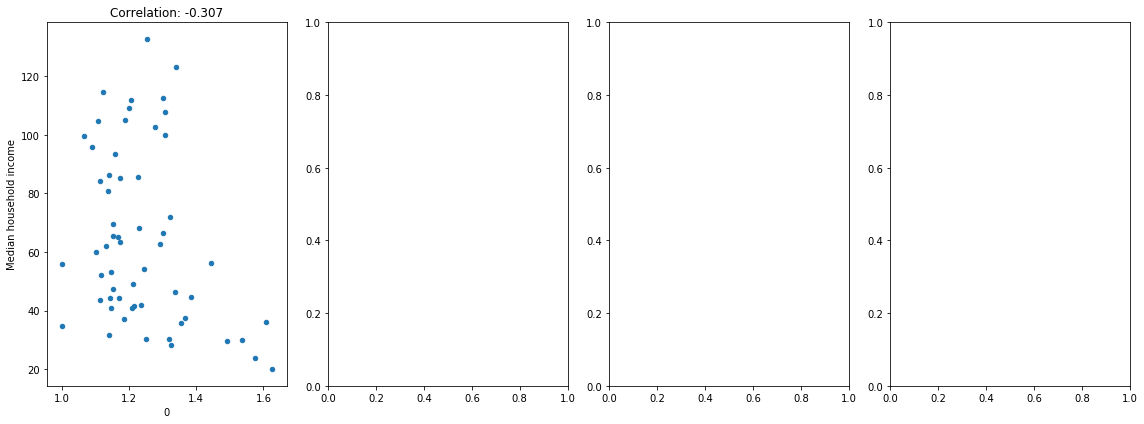

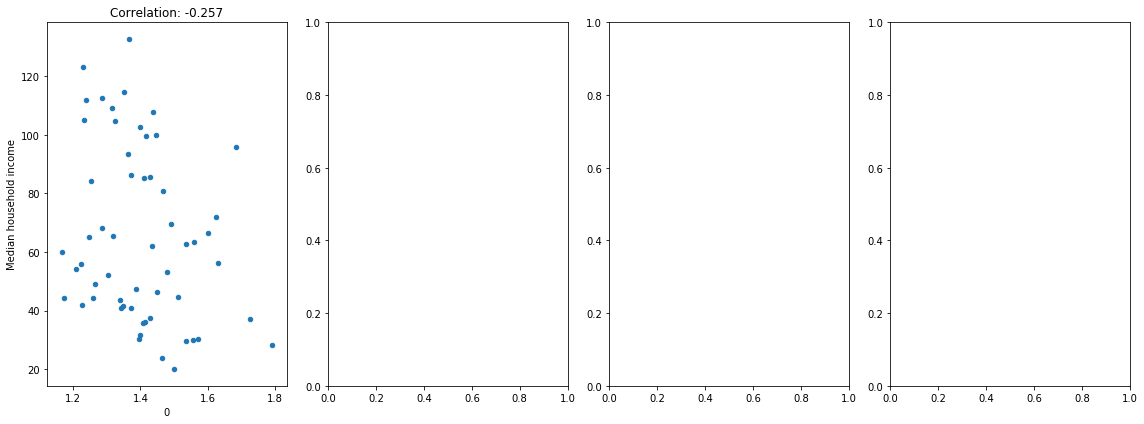

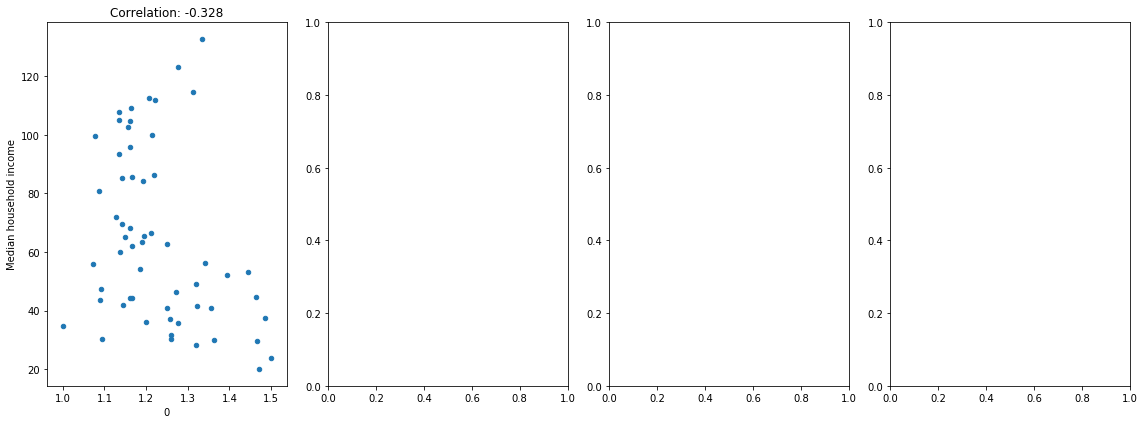

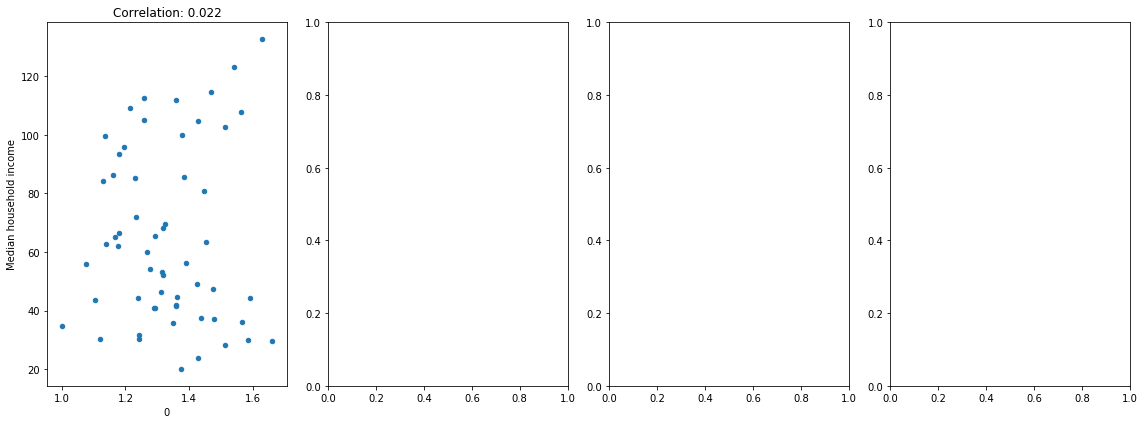

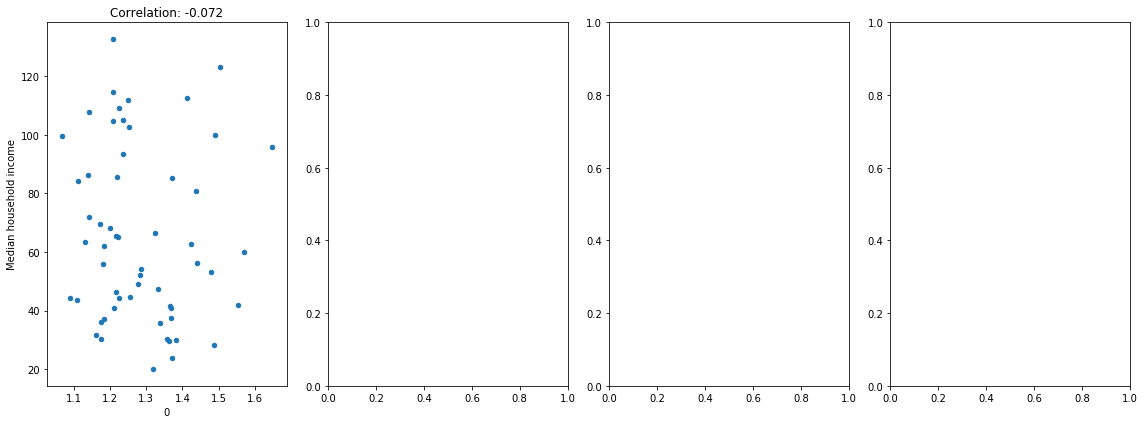

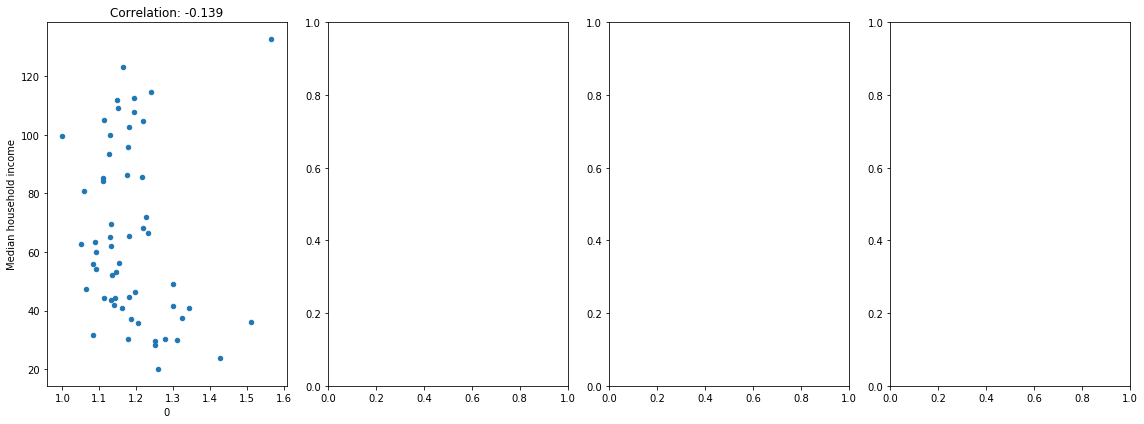

In [198]:
# no significant difference/correlation shown in normalized inspections. 


for y in range(2010,2019):
    df_year = df[df.year == y]
    franchise_pass_rate = pd.DataFrame(df_year.groupby('Zip').size()/df_year.drop_duplicates('License #').groupby('Zip').size())

    
    
    df_joined_nb_violations = franchise_pass_rate.join(df_zip_codes)
    column_name1 = df_zip_codes.columns[1]
    #for column_name1 in df_zip_codes.columns:
    fig, ax = plt.subplots(1, len(df_zip_codes.columns), figsize=(16,6))
    #print(ax)
    for i, column_name2 in enumerate(huge_zip.columns):
        df_joined_nb_violations[[column_name2, column_name1]].plot.scatter(x=column_name2, y=column_name1, ax=ax[i])
        ax[i].set_title('Correlation: {}'.format("%.3f" % df_joined_nb_violations[column_name2].corr(df_joined_nb_violations[column_name1])))

    plt.tight_layout()
    plt.show()


In [123]:
# plotting all above per year? -> correlation dissapears
# analyzing violation severity according to franchise/region/year 

In [143]:
df

,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,...,Community,Neighborhood,Ward,Precinct,Violation IDs,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity,year
Inspection ID,,,,,,,,,,,,,,,,,,,,,
2320412,"DANTE'S PIZZA,INC.",DANTESPIZZA,2092884,Restaurant,High,3028 W ARMITAGE AVE,60647,2019-10-24,Canvass,Fail,...,LOGAN SQUARE,LOGAN SQUARE,32,22,"[38, 47, 53, 55, 58, 60]",6,0,0,6,2019
2320384,ARBOR,ARBOR,2363029,Restaurant,High,2545 W DIVERSEY AVE,60647,2019-10-24,Others,Pass,...,LOGAN SQUARE,LOGAN SQUARE,32,1,"[14, 25, 41, 47, 48, 55, 56, 57, 58, 60]",10,1,1,8,2019
2320447,BIG & LITTLE'S RESTAURANT,BIGLITTLESRESTAURANT,2464263,Restaurant,High,3000-3004 W FULLERTON AVE,60647,2019-10-24,Complaint,Pass,...,LOGAN SQUARE,LOGAN SQUARE,32,11,"[1, 2, 16, 23, 25, 48, 49, 55, 56]",9,2,3,4,2019
2320395,MAX'S TAKE OUT,MAXSTAKEOUT,11172,Restaurant,High,20 E ADAMS ST,60603,2019-10-24,Canvass,Fail,...,LOOP,LOOP,42,33,"[10, 16, 39, 47, 48, 51, 53, 55]",8,1,1,6,2019
2320442,CHOI'S CHINESE KITCHEN,CHOISCHINESERESTAURANT,2517136,Restaurant,High,2638 N MILWAUKEE AVE,60647,2019-10-24,Canvass,Pass,...,LOGAN SQUARE,LOGAN SQUARE,35,25,"[37, 40, 53, 55]",4,0,0,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401418,LONG TUNG CHINESE KITCHEN,LONGTUNGCHINESEKITCHEN,1985572,Restaurant,High,6237 S HALSTED PKWY,60621,2011-01-10,Canvass,Pass,...,ENGLEWOOD,ENGLEWOOD,16,28,"[30, 32, 34, 35, 43]",5,0,0,5,2011
397232,O'HARE GASLIGHT CLUB,GASLIGHTCLUBHILTONOHARELOBBY,43114,Restaurant,High,4000 N O'HARE FIELD,60666,2010-11-18,Canvass,Pass,...,LOOP,LOOP,42,9,"[32, 33, 34, 35, 36]",5,0,0,5,2010
428993,THE LOGAN THEATRE,LOGANTHEATRE,2059729,Restaurant,Medium,2646 N MILWAUKEE AVE AVE,60647,2010-11-03,Task-force,Fail,...,LOGAN SQUARE,LOGAN SQUARE,35,25,"[18, 21, 31, 32, 33, 35, 38]",7,0,2,5,2010


In [ ]:
# # inspection in franchises / non-franchises
# 